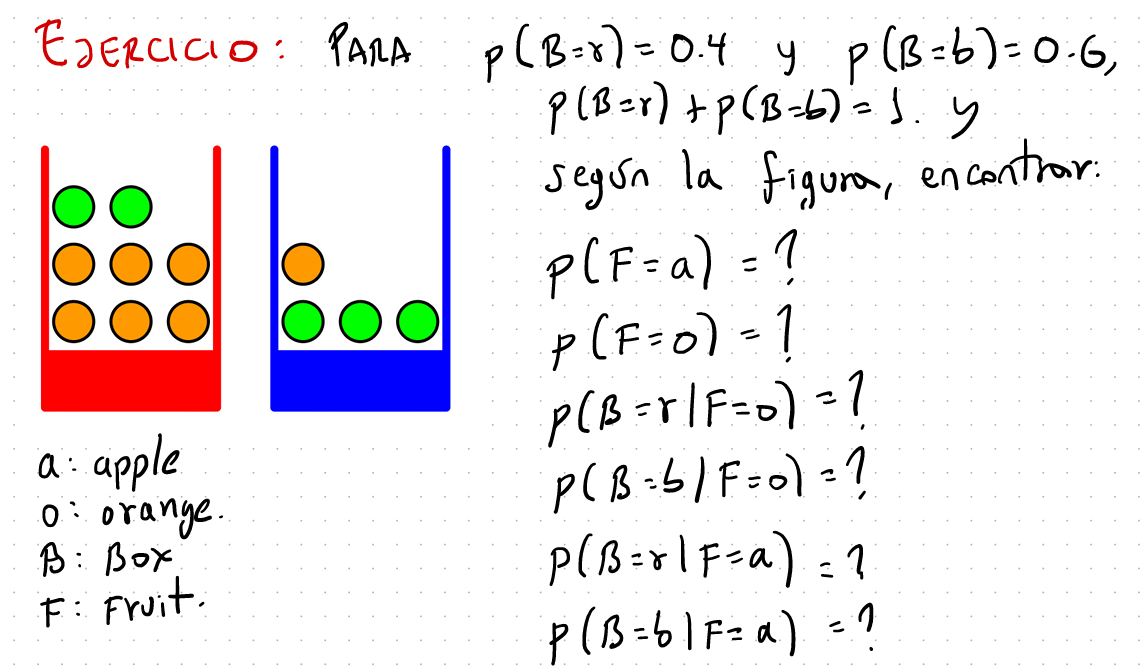

##Parte 1: Calculo manual

In [10]:
def probs():
  P_B_r = 0.4 ##P(B=r)
  P_B_b = 0.6 ##P(B=b)

  P_F_a_B_r = 2/8 ##P(F=a|B=r)
  P_F_a_B_b = 3/4 ##P(F=a|B=b)

  P_F_o_B_r = 6/8 ##P(F=o|B=r)
  P_F_o_B_b = 1/4 ##P(F=o|B=b)

  P_F_a = P_F_a_B_r*P_B_r + P_F_a_B_b*P_B_b
  P_F_o = P_F_o_B_r*P_B_r + P_F_o_B_b*P_B_b

  print(f'La probabilidad de que la fruta sea una manzana es: {P_F_a:.2}')
  print(f'La probabilidad de que la fruta sea una naranja es: {P_F_o:.2}\n')

  P_B_r_F_o = P_F_o_B_r*P_B_r/P_F_o
  P_B_b_F_o = P_F_o_B_b*P_B_b/P_F_o

  print(f'La probabilidad de que la fruta sea una naranja y venga de la caja roja es: {P_B_r_F_o:.2}')
  print(f'La probabilidad de que la fruta sea una naranja y venga de la caja azul es: {P_B_b_F_o:.2}\n')

  P_B_r_F_r = P_F_a_B_r*P_B_r/P_F_a
  P_B_b_F_r = P_F_a_B_b*P_B_b/P_F_a

  print(f'La probabilidad de que la fruta sea una manzana y venga de la caja roja es: {P_B_r_F_r:.2}')
  print(f'La probabilidad de que la fruta sea una manzana y venga de la caja azul es: {P_B_b_F_r:.2}\n')

probs()

La probabilidad de que la fruta sea una manzana es: 0.55
La probabilidad de que la fruta sea una naranja es: 0.45

La probabilidad de que la fruta sea una naranja y venga de la caja roja es: 0.67
La probabilidad de que la fruta sea una naranja y venga de la caja azul es: 0.33

La probabilidad de que la fruta sea una manzana y venga de la caja roja es: 0.18
La probabilidad de que la fruta sea una manzana y venga de la caja azul es: 0.82



##Parte 2: Cálculo automático

Prompt: Dame una función en python que se llame probs_auto(): que esté diseñada para recibir una lista de diccionarios, cada diccionario debe tener el par clave-valor "fruta_1", "fruta_2"... "fruta_x" que hacen referencia al número de esos elementos dentro de una caja la cual sería el diccionario, también debe tener la clave "prob" que es la probabilidad de elegir dicha caja, después de recibir el diccionario con esa información quiero que calcules todas las probabilidades condicionales y las probabilidades marginles de todos los posibles eventos

In [11]:
from collections import defaultdict

def probs_auto(cajas):
    """
    Recibe una lista de diccionarios, donde cada diccionario representa una caja con cantidades
    de frutas y una clave 'prob' con la probabilidad de elegir esa caja.
    Calcula:
    - Probabilidades marginales de cada fruta.
    - Probabilidades condicionales de cada fruta dado la caja y viceversa.
    """
    frutas = set()
    total_marginal = defaultdict(float)
    total_frutas_en_caja = []

    # Paso 1: identificar todas las frutas y sumar frutas por caja
    for caja in cajas:
        frutas_en_caja = 0
        for clave, valor in caja.items():
            if clave != 'prob':
                frutas.add(clave)
                frutas_en_caja += valor
        total_frutas_en_caja.append(frutas_en_caja)

    # Paso 2: Calcular probabilidades marginales de cada fruta
    for i, caja in enumerate(cajas):
        for fruta in frutas:
            cantidad = caja.get(fruta, 0)
            total_marginal[fruta] += (cantidad / total_frutas_en_caja[i]) * caja["prob"]

    # Paso 3: Calcular probabilidades condicionales P(caja | fruta)
    prob_caja_dado_fruta = defaultdict(dict)
    for fruta in frutas:
        for i, caja in enumerate(cajas):
            cantidad = caja.get(fruta, 0)
            if total_marginal[fruta] > 0:
                p_fruta_dada_caja = (cantidad / total_frutas_en_caja[i])
                p_caja = caja['prob']
                p_caja_dado_f = (p_fruta_dada_caja * p_caja) / total_marginal[fruta]
                prob_caja_dado_fruta[fruta][f'caja_{i+1}'] = p_caja_dado_f
            else:
                prob_caja_dado_fruta[fruta][f'caja_{i+1}'] = 0.0

    # Mostrar resultados
    print("\nProbabilidades marginales P(fruta):")
    for fruta, prob in total_marginal.items():
        print(f"P({fruta}) = {prob:.2}")

    print("\nProbabilidades condicionales P(caja | fruta):")
    for fruta, cajas_probs in prob_caja_dado_fruta.items():
        print(f"\nDada {fruta}:")
        for caja, prob in cajas_probs.items():
            print(f"P({caja} | {fruta}) = {prob:.2}")

    return total_marginal, prob_caja_dado_fruta


In [12]:
caja_roja = {"manzanas": 2, "naranjas": 6, "prob": 0.4}
caja_azul = {"manzanas": 3, "naranjas": 1, "prob": 0.6}
cajas = [caja_roja, caja_azul]

_, _ = probs_auto(cajas)


Probabilidades marginales P(fruta):
P(naranjas) = 0.45
P(manzanas) = 0.55

Probabilidades condicionales P(caja | fruta):

Dada naranjas:
P(caja_1 | naranjas) = 0.67
P(caja_2 | naranjas) = 0.33

Dada manzanas:
P(caja_1 | manzanas) = 0.18
P(caja_2 | manzanas) = 0.82


In [13]:
caja_1 = {"manzanas": 3, "naranjas": 2, "bananos": 5, "prob": 0.3}
caja_2 = {"manzanas": 4, "naranjas": 4, "bananos": 2, "prob": 0.5}
caja_3 = {"manzanas": 1, "naranjas": 5, "bananos": 4, "prob": 0.2}
cajas = [caja_1, caja_2, caja_3]

_, _ = probs_auto(cajas)


Probabilidades marginales P(fruta):
P(naranjas) = 0.36
P(manzanas) = 0.31
P(bananos) = 0.33

Probabilidades condicionales P(caja | fruta):

Dada naranjas:
P(caja_1 | naranjas) = 0.17
P(caja_2 | naranjas) = 0.56
P(caja_3 | naranjas) = 0.28

Dada manzanas:
P(caja_1 | manzanas) = 0.29
P(caja_2 | manzanas) = 0.65
P(caja_3 | manzanas) = 0.065

Dada bananos:
P(caja_1 | bananos) = 0.45
P(caja_2 | bananos) = 0.3
P(caja_3 | bananos) = 0.24
